## Introduction

#### Background
The Chicagoland area is one of the largest metropolitan areas in the United States.  Outside the city limits of Chicago there is a collar of suburbs that many people call home.  While the suburbs are very similar in some respects, they also vary in many different ways including home values and nearby business and entertainment venues.  This project will explore and compare the suburbs of Chicago in Cook County using median home value data from Zillow and venue location data from Foursquare.  

#### Description of Project
Different suburbs in the Chicagoland area have very different home values and very different amenities available.  There are many variables in determining the price of a home, one of those variables would be the available amenities.  In this case we will attempt to compare the suburbs of Chicago using Foursquare location data to give an idea of what neighborhoods have similar entertainment and other venues available.  This data will then be cross referenced to home value prices of those neighborhoods.  Analysis of this data should show neighborhoods that might be desirable because they include the same amenities as higher priced neighborhoods.  While other variables such as school rankings play a large role in determining home prices in various neighborhoods for many people availble entertainment venues in a neighborhood may be the most important variable to them.  By exploring this data one could look for neighborhoods where they can buy a more affordable home while still having access to a similar set of amenities that are available in some of the more expensive suburbs.
    
#### Target Audience
The results are useful to anyone involved in real estate transactions in the Chicago suburbs, people looking to research Chicago suburban neighborhoods to buy a home, investors looking for possible up and coming neighborhoods which may be more likely to experience rapid appreciation of property values and those interested in discovering neighborhoods in the Chicago suburbs that are similar to other neighborhoods they are more familiar with.

Neighborhoods are always changing and often business investment in an area preceeds gains in housing prices.  If a suburb is becoming popular and businesses are opening new exciting experiences in the area, home prices in that area may begin to increase as people move to that area to be closer to those amenities.  By comparing the foursquare location data of different suburbs with median home values it may be possible to find neighborhoods that have had significant business investment but haven't seen a large increase in home values yet.  This data could be used to target neighborhoods for investment in housing to meet the demand of new buyers who will want to move to this area to take advantage of the available amenities.

## Data

For this project data will be used from Zillow and Foursquare in conjunction with latitude and longitude data from arcgis.

#### Median Home Value Index
Zillow provides detailed information about real estate in the United States.  Zillow uses available information from various sources about properties such as school rankings, previous sale prices, current listing prices, neighborhood crime, and much more to allow Zillow to estimate home values throughout the United States.  Additionally they can compile this data by zip code, state or other boundaries to estimate median home values for specific neighborhoods or states.

#### Service and Entertainment Venues
Foursquare provides data on entertainment and services venues available in requested locations.  Foursquare has a detailed database of businesses throughout the United States with information about these businesses such as location and type of business.

#### Importation, Collection and Processing of Data follows Below

#### Import Libraries

In [1]:
!conda install -c conda-forge geocoder
import geocoder
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    ratelim:         0.1.6-py_2        conda-forge

The following packages will be UPDATED:

    

#### Import Zillow home value data

In [2]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0a2158cf8e42429fbd9b9213092af051 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='q9g_olu0u0y4lDU69-w-QJyPLFr7s_lWpTV6jOEUy_C5',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0a2158cf8e42429fbd9b9213092af051.get_object(Bucket='capstonefinalproject-donotdelete-pr-toqvrdatdw1hqs',Key='homevalues.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
homevaluesdf = df_data_1

#### Get latitude and longitude data for suburbs using arcgis

In [3]:
#Make lists to store Lat and Long data
Lat = []
Lon = []

#loop to get lat and long from Zip Code in dataframe
for index, row in homevaluesdf.iterrows():
    g = geocoder.arcgis(row['Zip Code'])
    Lat.append(g.latlng[0])
    Lon.append(g.latlng[1])
    
#add lat and long data to dataframe
homevaluesdf['Latitude'] = Lat
homevaluesdf['Longitude'] = Lon
homevaluesdf

,Zip Code,City,Zillow Home Value Index,Latitude,Longitude
0,60803,Alsip,172200,41.671395,-87.733745
1,60004,Arlington Heights,320200,42.111150,-87.980430
2,60005,Arlington Heights,293200,42.069047,-87.992100
3,60010,Barrington,473900,42.110325,-88.157915
4,60104,Bellwood,159800,41.881870,-87.870935
5,60163,Berkeley,188900,41.886505,-87.908110
6,60402,Berwyn,205500,41.836362,-87.782985
7,60406,Blue Island,123500,41.664450,-87.686075
8,60455,Bridgeview,191100,41.745127,-87.806882
9,60155,Broadview,178900,41.858080,-87.855250


#### Remove Suburbs with low venue counts from Foursquare

After running k-means clustering several outlier communities were noticed.  Cross-checking these outlier suburbs with the venue counts returned by Foursquare showed that these outliers such as Steger, Barrington, Willow Springs and Chicago Heights were all suburbs with low venue counts returned by Foursquare.  Personal experience leads me to believe these communities have many more entertainment and service venues than those returned by Foursquare.  In order to improve clustering results and interpretation of the data I decided to remove any communities that returned 30 or less venues from Foursquare.

In [4]:
homevaluesdf.drop(index=[3, 13, 36, 44, 54, 63, 68, 72, 86, 90, 96], inplace=True)

#### Import Libraries

In [5]:
import numpy as np

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

!conda install requests
import requests

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.20.0         | 57 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  en

#### Map Chicago Suburbs

In [6]:
#Get Chicago Coordinates
address = 'Chicago, IL'
c = geocoder.arcgis(address)
latitude = c.latlng[0]
longitude = c.latlng[1]
print('The geograpical coordinates of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Chicago are 41.884250000000065, -87.63244999999995.


In [7]:
# create map of Chicago suburbs with markers using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, zipcode, suburb in zip(homevaluesdf['Latitude'], homevaluesdf['Longitude'], homevaluesdf['Zip Code'], homevaluesdf['City']):
    label = '{}, {}'.format(suburb, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)

## Cook County Suburbs of Chicago

In [65]:
map_chicago

#### Get Foursquare Location Data For Chicago Suburbs

In [9]:
# @hidden_cell
CLIENT_ID = '4LFX3MOVXA5D4JNOLH5AH1LIXMICNOYA5LQZ3Z4YYD1TI5KX' # Foursquare ID
CLIENT_SECRET = 'C1KG0G4NB51RUD2DVWEBQITUGDEMGMUYGRPDXWKR3LVFOMLK' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [10]:
LIMIT = 100 # limit number of venues

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
suburb_venues = getNearbyVenues(names=homevaluesdf['Zip Code'],
                                   latitudes=homevaluesdf['Latitude'],
                                   longitudes=homevaluesdf['Longitude']
                                  )

60803
60004
60005
60104
60163
60402
60406
60455
60155
60513
60459
60409
60415
60804
60478
60445
60016
60018
60007
60707
60201
60202
60203
60805
60422
60130
60131
60025
60026
60426
60429
60457
60162
60169
60456
60430
60458
60043
60525
60526
60438
60712
60534
60443
60153
60160
60053
60056
60714
60706
60164
60452
60453
60302
60304
60301
60461
60462
60067
60074
60463
60465
60068
60469
60070
60305
60171
60546
60472
60008
60193
60194
60173
60195
60176
60076
60077
60473
60165
60107
60501
60477
60487
60154
60558
60090
60091
60093
60482


#### One Hot Encoding Foursquare Data

In [15]:
suburb_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,60803,41.671395,-87.733745,Burrito Jalisco,41.674929,-87.739512,Mexican Restaurant
1,60803,41.671395,-87.733745,LA Fitness,41.673129,-87.740504,Gym / Fitness Center
2,60803,41.671395,-87.733745,DoubleTree by Hilton Hotel Chicago - Alsip,41.662869,-87.744492,Hotel
3,60803,41.671395,-87.733745,Jerry's Hockey,41.663567,-87.743044,Sporting Goods Shop
4,60803,41.671395,-87.733745,Fiesta Azteca,41.662772,-87.719504,Mexican Restaurant


In [16]:
# one hot encoding
suburb_onehot = pd.get_dummies(suburb_venues[['Venue Category']], prefix="", prefix_sep="")

# add zip code column back to dataframe
suburb_onehot['Zip Code'] = suburb_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [suburb_onehot.columns[-1]] + list(suburb_onehot.columns[:-1])
suburb_onehot = suburb_onehot[fixed_columns]

suburb_onehot.head()

,Zip Code,ATM,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,...,Watch Shop,Water Park,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,60803,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60803,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60803,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60803,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60803,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
suburb_onehot.shape

(6294, 341)

In [18]:
suburb_onehot['Zip Code'].value_counts()

60005    100
60805    100
60706    100
60712    100
60707    100
60456    100
60018    100
60304    100
60130    100
60076    100
60415    100
60302    100
60402    100
60202    100
60203    100
60173    100
60453    100
60077    100
60546    100
60525    100
60305    100
60301    100
60201    100
60462     99
60513     98
60056     97
60455     91
60160     89
60195     86
60068     85
        ... 
60193     57
60501     56
60194     54
60443     53
60008     53
60463     53
60459     51
60093     50
60016     49
60461     48
60053     46
60176     46
60804     45
60457     45
60487     45
60426     43
60452     43
60473     41
60070     41
60469     39
60478     37
60007     34
60465     34
60091     33
60558     33
60163     33
60472     32
60458     32
60422     32
60067     31
Name: Zip Code, Length: 89, dtype: int64

In [19]:
# group venues by zip code
suburb_grouped = suburb_onehot.groupby('Zip Code').mean().reset_index()
suburb_grouped

,Zip Code,ATM,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,...,Watch Shop,Water Park,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,60004,0.000000,0.012500,0.0,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,60005,0.000000,0.000000,0.0,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000
2,60007,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,60008,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,60016,0.020408,0.000000,0.0,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000
5,60018,0.010000,0.000000,0.0,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,60025,0.000000,0.000000,0.0,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,60026,0.000000,0.012500,0.0,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,60043,0.000000,0.000000,0.0,0.000000,0.032787,0.016393,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,60053,0.000000,0.000000,0.0,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
suburb_venues_sorted = pd.DataFrame(columns=columns)
suburb_venues_sorted['Zip Code'] = suburb_grouped['Zip Code']

for ind in np.arange(suburb_grouped.shape[0]):
    suburb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(suburb_grouped.iloc[ind, :], num_top_venues)

suburb_venues_sorted.head()

,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60004,Park,Grocery Store,Pizza Place,Liquor Store,Bakery,Chinese Restaurant,Clothing Store,Thrift / Vintage Store,Pet Store,Gift Shop
1,60005,Sandwich Place,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Pizza Place,Bar,Cosmetics Shop,Thai Restaurant,Park,Ice Cream Shop
2,60007,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Park,Japanese Restaurant,Shipping Store,Supermarket,Liquor Store,BBQ Joint
3,60008,Sandwich Place,Pizza Place,Fast Food Restaurant,Racetrack,Sports Bar,Coffee Shop,Donut Shop,Skating Rink,Salon / Barbershop,Mexican Restaurant
4,60016,Mexican Restaurant,Donut Shop,Fast Food Restaurant,Sandwich Place,Bar,Bakery,ATM,Breakfast Spot,Café,College Cafeteria


## Methodology

Using IBM Watson Studio this project explored the suburbs of Chicago.  Data from Zillow and Foursquare were used to create a dataframe that could be used to compare the different suburbs.  Foursquare returned over 6,000 venues from over 300 different categories.  Using k-means clustering the suburbs were grouped into clusters according to similarity of their Foursquare data.  After the clusters were determined the folium library was usued to visualize the clusters on a map of the Chicagoland area.  Cluster labels were added to the dataframe so the data could be explored and compared with a focus on differences in median home values for each suburb.

#### Run KMeans with 6 Clusters

In [22]:
# set number of clusters.
kclusters = 6

suburb_grouped_clustering_1 = suburb_grouped.drop('Zip Code', 1)

In [23]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(suburb_grouped_clustering_1)

In [24]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 4, 0, 0, 1, 4, 4, 3, 3, 3, 4, 1, 4, 5, 0, 4, 4, 0, 3, 3, 0, 4,
       5, 5, 0, 4, 0, 0, 4, 0, 5, 0, 4, 5, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3,
       3, 3, 5, 1, 4, 4, 1, 0, 4, 1, 5, 4, 0, 1, 4, 5, 0, 5, 5, 0, 0, 4,
       1, 5, 0, 0, 0, 5, 0, 1, 5, 0, 2, 4, 4, 5, 2, 3, 4, 5, 4, 5, 5, 0,
       0], dtype=int32)

In [25]:
# add clustering labels
from copy import copy
suburb_venues_sorted_1 = copy(suburb_venues_sorted)
suburb_venues_sorted_1.insert(0, 'Cluster Labels', kmeans.labels_)

In [26]:
# merge suburb_venues_sorted with homevaluesdf to add latitude/longitude for each neighborhood
suburb_merged_1 = homevaluesdf.join(suburb_venues_sorted_1.set_index('Zip Code'), on='Zip Code')

#### Use KElbowVisualizer to determine if there is an optimal K value

KElbowVisualizer was used to determine if there was an optimal k value for clustering data.  Although a k of 6 was recommended the plot was relatively smooth indicating that an optimal k value was not obvious.  For this reason several other k values were run to see if further insight could be gained from these models.

Solving environment: done

# All requested packages already installed.



/opt/conda/envs/Python36/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


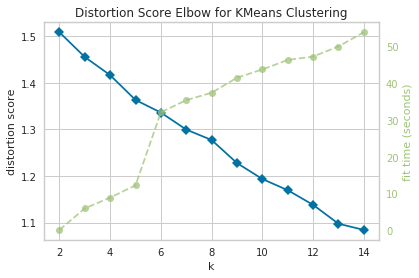

In [28]:
!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2,15))

visualizer.fit(suburb_grouped_clustering_1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### Run KMeans with 3 clusters

In [29]:
# set number of clusters.
kclusters_2 = 3

suburb_grouped_clustering_2 = suburb_grouped.drop('Zip Code', 1)

# run k-means clustering
kmeans_2 = KMeans(n_clusters=kclusters_2, random_state=0).fit(suburb_grouped_clustering_2)

suburb_venues_sorted_2 = copy(suburb_venues_sorted)
suburb_venues_sorted_2.insert(0, 'Cluster Labels', kmeans_2.labels_)

# merge suburb_venues_sorted with homevaluesdf to add latitude/longitude for each neighborhood
suburb_merged_2 = homevaluesdf.join(suburb_venues_sorted_2.set_index('Zip Code'), on='Zip Code')

#### Run KMeans with 2 Clusters

In [30]:
# set number of clusters.
kclusters_3 = 2

suburb_grouped_clustering_3 = suburb_grouped.drop('Zip Code', 1)

# run k-means clustering
kmeans_3 = KMeans(n_clusters=kclusters_3, random_state=0).fit(suburb_grouped_clustering_3)

suburb_venues_sorted_3 = copy(suburb_venues_sorted)
suburb_venues_sorted_3.insert(0, 'Cluster Labels', kmeans_3.labels_)

# merge suburb_venues_sorted with homevaluesdf to add latitude/longitude for each neighborhood
suburb_merged_3 = homevaluesdf.join(suburb_venues_sorted_3.set_index('Zip Code'), on='Zip Code')

#### Run KMeans with 7 Clusters

In [31]:
# set number of clusters.
kclusters_4 = 7

suburb_grouped_clustering_4 = suburb_grouped.drop('Zip Code', 1)

# run k-means clustering
kmeans_4 = KMeans(n_clusters=kclusters_4, random_state=0).fit(suburb_grouped_clustering_4)

suburb_venues_sorted_4 = copy(suburb_venues_sorted)
suburb_venues_sorted_4.insert(0, 'Cluster Labels', kmeans_4.labels_)

# merge suburb_venues_sorted with homevaluesdf to add latitude/longitude for each neighborhood
suburb_merged_4 = homevaluesdf.join(suburb_venues_sorted_4.set_index('Zip Code'), on='Zip Code')

#### Run KMeans with 8 Clusters

In [32]:
# set number of clusters.
kclusters_5 = 8

suburb_grouped_clustering_5 = suburb_grouped.drop('Zip Code', 1)

# run k-means clustering
kmeans_5 = KMeans(n_clusters=kclusters_5, random_state=0).fit(suburb_grouped_clustering_5)

suburb_venues_sorted_5 = copy(suburb_venues_sorted)
suburb_venues_sorted_5.insert(0, 'Cluster Labels', kmeans_5.labels_)

# merge suburb_venues_sorted with homevaluesdf to add latitude/longitude for each neighborhood
suburb_merged_5 = homevaluesdf.join(suburb_venues_sorted_5.set_index('Zip Code'), on='Zip Code')

## Results

Below are Visualizations and dataframes that explore the Foursquare and Zillow Home Value data.  Elbow Visualization of k-means clustering was not conclusive so several k values were run for comparison.  Analysis focused on clustering with k values of 6 and 3.  Clustering was performed on Foursquare data, interstingly the clusters returned in most cases grouped suburbs with high median home values into the same cluster despite this information not being used in the k-means analysis.  This leads me to believe that high median home value suburbs do have similar entertainment and service venues as returned by Foursquare.  The highest median home suburbs are all north shore suburbs.  With a k value of 6 the suburbs of Oak Park, Evanston and Morton Grove had the lowest median home values while having similar entertainment and service options compared to the highest median home value suburbs such as Kenilworth and Winnetka.  With a k value of 3 the list of suburbs similar to the highest median home value suburbs grows and suburbs with even lower median home values are included.  The suburbs Homewood, Schaumburg, Worth, Oak Forest and Oak Lawn had the lowest median home values while still being in the same cluster as the highest median home value suburbs Kenilworth and Winnetka.

#### Visualize Cluster Data on Map, 6 Clusters

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, code, city, hvi, cluster in zip(suburb_merged_1['Latitude'], suburb_merged_1['Longitude'], suburb_merged_1['Zip Code'], suburb_merged_1['City'], suburb_merged_1['Zillow Home Value Index'], suburb_merged_1['Cluster Labels']):
    label = folium.Popup(str(code) + ', ' + str(city) + ' HVI ' + str(hvi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Explore Clusters 6 Clusters

In [34]:
suburb_merged_1.loc[suburb_merged_1['Cluster Labels'] == 0, suburb_merged_1.columns[[0] + [1] + [2] + list(range(5, suburb_merged_1.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,60104,Bellwood,159800,0,Sandwich Place,Mexican Restaurant,Pizza Place,Donut Shop,Seafood Restaurant,Chinese Restaurant,Discount Store,Hot Dog Joint,Ice Cream Shop,Fast Food Restaurant
5,60163,Berkeley,188900,0,Trail,Pizza Place,Fast Food Restaurant,Train Station,Mexican Restaurant,Food,Storage Facility,Shipping Store,Taco Place,Dive Bar
9,60155,Broadview,178900,0,Fast Food Restaurant,Hot Dog Joint,Pharmacy,Sandwich Place,Coffee Shop,Pizza Place,Video Store,Fried Chicken Joint,Chinese Restaurant,Wings Joint
11,60459,Burbank,196200,0,Pizza Place,Deli / Bodega,Intersection,Gas Station,Burrito Place,Bar,Park,Discount Store,Sandwich Place,Furniture / Home Store
15,60804,Cicero,174200,0,Mexican Restaurant,Pharmacy,Mobile Phone Shop,Grocery Store,Discount Store,Park,Fast Food Restaurant,Spa,Stadium,Food & Drink Shop
16,60478,Country Club Hills,126200,0,Sandwich Place,Breakfast Spot,Intersection,Grocery Store,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Caribbean Restaurant,Liquor Store,Discount Store
17,60445,Crestwood,143700,0,Sandwich Place,Grocery Store,Pub,Discount Store,Pizza Place,Gas Station,Fried Chicken Joint,Italian Restaurant,Intersection,Baseball Stadium
20,60007,Elk Grove Village,254000,0,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Park,Japanese Restaurant,Shipping Store,Supermarket,Liquor Store,BBQ Joint
25,60805,Evergreen Park,188800,0,Pizza Place,Sandwich Place,Ice Cream Shop,Fast Food Restaurant,Discount Store,Pharmacy,Coffee Shop,Gas Station,Hot Dog Joint,Grocery Store
31,60426,Harvey,43000,0,Discount Store,Mexican Restaurant,Fried Chicken Joint,American Restaurant,Lounge,Gas Station,Clothing Store,Seafood Restaurant,Grocery Store,Burger Joint


In [35]:
suburb_merged_1.loc[suburb_merged_1['Cluster Labels'] == 1, suburb_merged_1.columns[[0] + [1] + [2] + list(range(5, suburb_merged_1.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,60406,Blue Island,123500,1,Bar,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Golf Course,Gay Bar,Restaurant,Train Station,Grocery Store
18,60016,Des Plaines,227500,1,Mexican Restaurant,Donut Shop,Fast Food Restaurant,Sandwich Place,Bar,Bakery,ATM,Breakfast Spot,Café,College Cafeteria
26,60422,Flossmoor,214900,1,Park,Hospital,Train Station,Pizza Place,Pharmacy,Discount Store,Breakfast Spot,Brewery,Spa,Business Service
38,60430,Homewood,155700,1,Bar,Pizza Place,Baseball Field,Ice Cream Shop,Deli / Bodega,American Restaurant,Mexican Restaurant,Coffee Shop,Train Station,Gym / Fitness Center
56,60452,Oak Forest,189900,1,Bar,Pizza Place,Breakfast Spot,Sports Bar,Ice Cream Shop,Salon / Barbershop,Burger Joint,Supermarket,Pharmacy,Pub
64,60067,Palatine,308700,1,Sandwich Place,Park,Liquor Store,Irish Pub,Chinese Restaurant,Coffee Shop,Music Store,Optical Shop,Golf Course,Baseball Field
66,60463,Palos Heights,267400,1,Sandwich Place,Pizza Place,Bar,Lake,Convenience Store,Intersection,New American Restaurant,Coffee Shop,Breakfast Spot,Italian Restaurant
99,60482,Worth,173000,1,Middle Eastern Restaurant,Bar,Fast Food Restaurant,Sandwich Place,Pizza Place,Chinese Restaurant,Convenience Store,Donut Shop,Mexican Restaurant,Steakhouse


In [36]:
suburb_merged_1.loc[suburb_merged_1['Cluster Labels'] == 2, suburb_merged_1.columns[[0] + [1] + [2] + list(range(5, suburb_merged_1.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,60513,Brookfield,235900,2,Zoo Exhibit,Exhibit,Mexican Restaurant,Playground,Pharmacy,Fast Food Restaurant,Video Store,Ice Cream Shop,Chinese Restaurant,Convenience Store
75,60546,Riverside,280800,2,Zoo Exhibit,Exhibit,Fast Food Restaurant,Mexican Restaurant,Italian Restaurant,Bar,Grocery Store,Donut Shop,Clothing Store,Sandwich Place


In [37]:
suburb_merged_1.loc[suburb_merged_1['Cluster Labels'] == 3, suburb_merged_1.columns[[0] + [1] + [2] + list(range(5, suburb_merged_1.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,60201,Evanston,417300,3,Coffee Shop,American Restaurant,Bakery,Pizza Place,Bar,Sushi Restaurant,Grocery Store,Café,Gym,Thai Restaurant
23,60202,Evanston,270400,3,Coffee Shop,Pizza Place,Brewery,Sushi Restaurant,Park,Bakery,Thai Restaurant,American Restaurant,Gym,Mexican Restaurant
30,60026,Glenview,552800,3,Pizza Place,Coffee Shop,Sandwich Place,Shopping Mall,Gym,Bank,Sporting Goods Shop,Breakfast Spot,Bar,Café
40,60043,Kenilworth,1316800,3,Pizza Place,Park,Gym,Pet Store,American Restaurant,Pharmacy,Sushi Restaurant,Supermarket,Beach,Ice Cream Shop
50,60053,Morton Grove,300500,3,Pizza Place,Pharmacy,Donut Shop,Diner,Gym,Spa,Supermarket,Cafeteria,Gas Station,Tea Room
58,60302,Oak Park,343100,3,Park,Historic Site,Italian Restaurant,Mexican Restaurant,Gym,Coffee Shop,Grocery Store,Thai Restaurant,Bar,Bakery
59,60304,Oak Park,353100,3,Italian Restaurant,Park,Pizza Place,Ice Cream Shop,Coffee Shop,Bar,Fast Food Restaurant,Hot Dog Joint,Breakfast Spot,Thai Restaurant
60,60301,Oak Park,180500,3,Italian Restaurant,American Restaurant,Ice Cream Shop,Coffee Shop,Sandwich Place,Park,Breakfast Spot,Grocery Store,Historic Site,Bakery
73,60305,River Forest,510500,3,Coffee Shop,Italian Restaurant,American Restaurant,Pizza Place,Fast Food Restaurant,Ice Cream Shop,Sandwich Place,Gym,Donut Shop,Historic Site
94,60558,Western Springs,520500,3,Coffee Shop,Grocery Store,American Restaurant,Park,Sports Bar,Nature Preserve,Golf Course,Theater,Gas Station,Boutique


In [64]:
sixclusters_three = suburb_merged_1.loc[suburb_merged_1['Cluster Labels'] == 3, suburb_merged_1.columns[[0] + [1] + [2] + list(range(5, suburb_merged_1.shape[1]))]]
sixclusters_three.sort_values(by=['Zillow Home Value Index'])

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,60301,Oak Park,180500,3,Italian Restaurant,American Restaurant,Ice Cream Shop,Coffee Shop,Sandwich Place,Park,Breakfast Spot,Grocery Store,Historic Site,Bakery
23,60202,Evanston,270400,3,Coffee Shop,Pizza Place,Brewery,Sushi Restaurant,Park,Bakery,Thai Restaurant,American Restaurant,Gym,Mexican Restaurant
50,60053,Morton Grove,300500,3,Pizza Place,Pharmacy,Donut Shop,Diner,Gym,Spa,Supermarket,Cafeteria,Gas Station,Tea Room
58,60302,Oak Park,343100,3,Park,Historic Site,Italian Restaurant,Mexican Restaurant,Gym,Coffee Shop,Grocery Store,Thai Restaurant,Bar,Bakery
59,60304,Oak Park,353100,3,Italian Restaurant,Park,Pizza Place,Ice Cream Shop,Coffee Shop,Bar,Fast Food Restaurant,Hot Dog Joint,Breakfast Spot,Thai Restaurant
22,60201,Evanston,417300,3,Coffee Shop,American Restaurant,Bakery,Pizza Place,Bar,Sushi Restaurant,Grocery Store,Café,Gym,Thai Restaurant
73,60305,River Forest,510500,3,Coffee Shop,Italian Restaurant,American Restaurant,Pizza Place,Fast Food Restaurant,Ice Cream Shop,Sandwich Place,Gym,Donut Shop,Historic Site
94,60558,Western Springs,520500,3,Coffee Shop,Grocery Store,American Restaurant,Park,Sports Bar,Nature Preserve,Golf Course,Theater,Gas Station,Boutique
30,60026,Glenview,552800,3,Pizza Place,Coffee Shop,Sandwich Place,Shopping Mall,Gym,Bank,Sporting Goods Shop,Breakfast Spot,Bar,Café
97,60091,Wilmette,624200,3,Coffee Shop,American Restaurant,Pizza Place,Golf Course,Park,Ice Cream Shop,Diner,Playground,French Restaurant,Latin American Restaurant


In [38]:
suburb_merged_1.loc[suburb_merged_1['Cluster Labels'] == 4, suburb_merged_1.columns[[0] + [1] + [2] + list(range(5, suburb_merged_1.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,60004,Arlington Heights,320200,4,Park,Grocery Store,Pizza Place,Liquor Store,Bakery,Chinese Restaurant,Clothing Store,Thrift / Vintage Store,Pet Store,Gift Shop
2,60005,Arlington Heights,293200,4,Sandwich Place,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Pizza Place,Bar,Cosmetics Shop,Thai Restaurant,Park,Ice Cream Shop
12,60409,Calumet City,86900,4,Fast Food Restaurant,Department Store,Mexican Restaurant,Jewelry Store,Pharmacy,Bar,Cosmetics Shop,Mobile Phone Shop,Hot Dog Joint,Lingerie Store
14,60415,Chicago Ridge,144800,4,Clothing Store,Fast Food Restaurant,Pizza Place,Rental Car Location,Gas Station,Sandwich Place,Donut Shop,Middle Eastern Restaurant,Mexican Restaurant,Convenience Store
19,60018,Des Plaines,254600,4,Hotel,Rental Car Location,American Restaurant,Coffee Shop,Sandwich Place,Steakhouse,Pizza Place,Donut Shop,Mexican Restaurant,Italian Restaurant
24,60203,Evanston,375700,4,Pharmacy,American Restaurant,Park,Mediterranean Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Bank,Gas Station,Bagel Shop
29,60025,Glenview,397900,4,Sandwich Place,Hotel,Electronics Store,Coffee Shop,Korean Restaurant,Pizza Place,Donut Shop,Soccer Field,Baseball Field,Park
32,60429,Hazel Crest,109000,4,Fast Food Restaurant,Fried Chicken Joint,Discount Store,Gym / Fitness Center,Intersection,BBQ Joint,Bakery,Toll Plaza,Sandwich Place,Golf Course
34,60162,Hillside,184900,4,Donut Shop,Pizza Place,Fast Food Restaurant,Mexican Restaurant,Pharmacy,Gas Station,Shipping Store,Breakfast Spot,Sandwich Place,Bank
35,60169,Hoffman Estates,233900,4,Indian Restaurant,Park,Grocery Store,Fast Food Restaurant,Rental Car Location,Convenience Store,Sandwich Place,Nature Preserve,Liquor Store,Pizza Place


In [39]:
suburb_merged_1.loc[suburb_merged_1['Cluster Labels'] == 5, suburb_merged_1.columns[[0] + [1] + [2] + list(range(5, suburb_merged_1.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60803,Alsip,172200,5,Mexican Restaurant,Fast Food Restaurant,Gas Station,American Restaurant,Hotel,Sandwich Place,Donut Shop,Discount Store,Grocery Store,Chinese Restaurant
6,60402,Berwyn,205500,5,Mexican Restaurant,Pizza Place,Bank,Pharmacy,American Restaurant,Bar,Donut Shop,Fast Food Restaurant,Park,Gas Station
8,60455,Bridgeview,191100,5,Fast Food Restaurant,Pizza Place,Gas Station,Breakfast Spot,Ice Cream Shop,Sandwich Place,Pharmacy,Bakery,Grocery Store,Intersection
21,60707,Elmwood Park,241900,5,Fast Food Restaurant,Grocery Store,Mexican Restaurant,Sandwich Place,Convenience Store,Italian Restaurant,Deli / Bodega,Pharmacy,Pizza Place,Discount Store
27,60130,Forest Park,199100,5,Sandwich Place,Fast Food Restaurant,Bar,Pizza Place,Coffee Shop,Thai Restaurant,Park,American Restaurant,Mexican Restaurant,Hot Dog Joint
28,60131,Franklin Park,196000,5,Fast Food Restaurant,Pizza Place,Italian Restaurant,Coffee Shop,Sandwich Place,Hotel,Bar,Mexican Restaurant,Rental Car Location,American Restaurant
33,60457,Hickory Hills,225400,5,Fast Food Restaurant,Gas Station,Pizza Place,Pharmacy,Discount Store,Donut Shop,Sandwich Place,Gym,Bar,Sports Bar
39,60458,Justice,188000,5,Sports Bar,Toll Plaza,Liquor Store,Flower Shop,Fast Food Restaurant,Gas Station,Taco Place,Storage Facility,Food,Mexican Restaurant
43,60438,Lansing,117000,5,Fast Food Restaurant,Pizza Place,American Restaurant,Bar,Liquor Store,Discount Store,Mexican Restaurant,Automotive Shop,Sandwich Place,Coffee Shop
46,60534,Lyons,178600,5,American Restaurant,Fast Food Restaurant,Donut Shop,Pizza Place,Sandwich Place,Ice Cream Shop,Eastern European Restaurant,Italian Restaurant,Coffee Shop,Pub


#### Visualize Cluster Data on Map, 3 Clusters

In [67]:
# create map
map_clusters_2 = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters_2)
ys = [i + x + (i*x)**2 for i in range(kclusters_2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, code, city, hvi, cluster in zip(suburb_merged_2['Latitude'], suburb_merged_2['Longitude'], suburb_merged_2['Zip Code'], suburb_merged_2['City'], suburb_merged_2['Zillow Home Value Index'], suburb_merged_2['Cluster Labels']):
    label = folium.Popup(str(code) + ', ' + str(city) + ' HVI ' + str(hvi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_2)
       
map_clusters_2

#### Explore Clusters 3 Clusters

In [41]:
suburb_merged_2.loc[suburb_merged_2['Cluster Labels'] == 0, suburb_merged_2.columns[[0] + [1] + [2] + list(range(5, suburb_merged_2.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,60004,Arlington Heights,320200,0,Park,Grocery Store,Pizza Place,Liquor Store,Bakery,Chinese Restaurant,Clothing Store,Thrift / Vintage Store,Pet Store,Gift Shop
2,60005,Arlington Heights,293200,0,Sandwich Place,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Pizza Place,Bar,Cosmetics Shop,Thai Restaurant,Park,Ice Cream Shop
11,60459,Burbank,196200,0,Pizza Place,Deli / Bodega,Intersection,Gas Station,Burrito Place,Bar,Park,Discount Store,Sandwich Place,Furniture / Home Store
22,60201,Evanston,417300,0,Coffee Shop,American Restaurant,Bakery,Pizza Place,Bar,Sushi Restaurant,Grocery Store,Café,Gym,Thai Restaurant
23,60202,Evanston,270400,0,Coffee Shop,Pizza Place,Brewery,Sushi Restaurant,Park,Bakery,Thai Restaurant,American Restaurant,Gym,Mexican Restaurant
24,60203,Evanston,375700,0,Pharmacy,American Restaurant,Park,Mediterranean Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Bank,Gas Station,Bagel Shop
26,60422,Flossmoor,214900,0,Park,Hospital,Train Station,Pizza Place,Pharmacy,Discount Store,Breakfast Spot,Brewery,Spa,Business Service
30,60026,Glenview,552800,0,Pizza Place,Coffee Shop,Sandwich Place,Shopping Mall,Gym,Bank,Sporting Goods Shop,Breakfast Spot,Bar,Café
35,60169,Hoffman Estates,233900,0,Indian Restaurant,Park,Grocery Store,Fast Food Restaurant,Rental Car Location,Convenience Store,Sandwich Place,Nature Preserve,Liquor Store,Pizza Place
38,60430,Homewood,155700,0,Bar,Pizza Place,Baseball Field,Ice Cream Shop,Deli / Bodega,American Restaurant,Mexican Restaurant,Coffee Shop,Train Station,Gym / Fitness Center


#### Sort Cluster 0 by Home Values

In [42]:
threeclusters_zero = suburb_merged_2.loc[suburb_merged_2['Cluster Labels'] == 0, suburb_merged_2.columns[[0] + [1] + [2] + list(range(5, suburb_merged_2.shape[1]))]]
threeclusters_zero.sort_values(by=['Zillow Home Value Index'])

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,60430,Homewood,155700,0,Bar,Pizza Place,Baseball Field,Ice Cream Shop,Deli / Bodega,American Restaurant,Mexican Restaurant,Coffee Shop,Train Station,Gym / Fitness Center
81,60195,Schaumburg,159400,0,Indian Restaurant,Grocery Store,Fast Food Restaurant,Korean Restaurant,Pet Store,Rental Car Location,Department Store,Salon / Barbershop,Hookah Bar,Park
99,60482,Worth,173000,0,Middle Eastern Restaurant,Bar,Fast Food Restaurant,Sandwich Place,Pizza Place,Chinese Restaurant,Convenience Store,Donut Shop,Mexican Restaurant,Steakhouse
60,60301,Oak Park,180500,0,Italian Restaurant,American Restaurant,Ice Cream Shop,Coffee Shop,Sandwich Place,Park,Breakfast Spot,Grocery Store,Historic Site,Bakery
56,60452,Oak Forest,189900,0,Bar,Pizza Place,Breakfast Spot,Sports Bar,Ice Cream Shop,Salon / Barbershop,Burger Joint,Supermarket,Pharmacy,Pub
57,60453,Oak Lawn,195200,0,American Restaurant,Ice Cream Shop,Bakery,Sandwich Place,Mobile Phone Shop,Pharmacy,Pizza Place,Mexican Restaurant,Coffee Shop,Bar
11,60459,Burbank,196200,0,Pizza Place,Deli / Bodega,Intersection,Gas Station,Burrito Place,Bar,Park,Discount Store,Sandwich Place,Furniture / Home Store
79,60194,Schaumburg,199800,0,Indian Restaurant,Gym,Baseball Field,Convenience Store,Pizza Place,Thai Restaurant,Sandwich Place,Japanese Restaurant,Fast Food Restaurant,Pharmacy
26,60422,Flossmoor,214900,0,Park,Hospital,Train Station,Pizza Place,Pharmacy,Discount Store,Breakfast Spot,Brewery,Spa,Business Service
35,60169,Hoffman Estates,233900,0,Indian Restaurant,Park,Grocery Store,Fast Food Restaurant,Rental Car Location,Convenience Store,Sandwich Place,Nature Preserve,Liquor Store,Pizza Place


In [43]:
suburb_merged_2.loc[suburb_merged_2['Cluster Labels'] == 1, suburb_merged_2.columns[[0] + [1] + [2] + list(range(5, suburb_merged_2.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60803,Alsip,172200,1,Mexican Restaurant,Fast Food Restaurant,Gas Station,American Restaurant,Hotel,Sandwich Place,Donut Shop,Discount Store,Grocery Store,Chinese Restaurant
4,60104,Bellwood,159800,1,Sandwich Place,Mexican Restaurant,Pizza Place,Donut Shop,Seafood Restaurant,Chinese Restaurant,Discount Store,Hot Dog Joint,Ice Cream Shop,Fast Food Restaurant
5,60163,Berkeley,188900,1,Trail,Pizza Place,Fast Food Restaurant,Train Station,Mexican Restaurant,Food,Storage Facility,Shipping Store,Taco Place,Dive Bar
6,60402,Berwyn,205500,1,Mexican Restaurant,Pizza Place,Bank,Pharmacy,American Restaurant,Bar,Donut Shop,Fast Food Restaurant,Park,Gas Station
7,60406,Blue Island,123500,1,Bar,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Golf Course,Gay Bar,Restaurant,Train Station,Grocery Store
8,60455,Bridgeview,191100,1,Fast Food Restaurant,Pizza Place,Gas Station,Breakfast Spot,Ice Cream Shop,Sandwich Place,Pharmacy,Bakery,Grocery Store,Intersection
9,60155,Broadview,178900,1,Fast Food Restaurant,Hot Dog Joint,Pharmacy,Sandwich Place,Coffee Shop,Pizza Place,Video Store,Fried Chicken Joint,Chinese Restaurant,Wings Joint
10,60513,Brookfield,235900,1,Zoo Exhibit,Exhibit,Mexican Restaurant,Playground,Pharmacy,Fast Food Restaurant,Video Store,Ice Cream Shop,Chinese Restaurant,Convenience Store
12,60409,Calumet City,86900,1,Fast Food Restaurant,Department Store,Mexican Restaurant,Jewelry Store,Pharmacy,Bar,Cosmetics Shop,Mobile Phone Shop,Hot Dog Joint,Lingerie Store
14,60415,Chicago Ridge,144800,1,Clothing Store,Fast Food Restaurant,Pizza Place,Rental Car Location,Gas Station,Sandwich Place,Donut Shop,Middle Eastern Restaurant,Mexican Restaurant,Convenience Store


In [44]:
suburb_merged_2.loc[suburb_merged_2['Cluster Labels'] == 2, suburb_merged_2.columns[[0] + [1] + [2] + list(range(5, suburb_merged_2.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,60018,Des Plaines,254600,2,Hotel,Rental Car Location,American Restaurant,Coffee Shop,Sandwich Place,Steakhouse,Pizza Place,Donut Shop,Mexican Restaurant,Italian Restaurant
29,60025,Glenview,397900,2,Sandwich Place,Hotel,Electronics Store,Coffee Shop,Korean Restaurant,Pizza Place,Donut Shop,Soccer Field,Baseball Field,Park
47,60443,Matteson,162200,2,Hotel,Sandwich Place,Mobile Phone Shop,Rental Car Location,Coffee Shop,Cosmetics Shop,Light Rail Station,Pizza Place,Pet Store,Department Store
80,60173,Schaumburg,247800,2,Clothing Store,Furniture / Home Store,American Restaurant,Coffee Shop,Mexican Restaurant,Burger Joint,Italian Restaurant,Hotel,Breakfast Spot,Steakhouse
82,60176,Schiller Park,209100,2,Clothing Store,Hotel,American Restaurant,Accessories Store,Seafood Restaurant,Candy Store,Mexican Restaurant,Brewery,Italian Restaurant,Dog Run
84,60077,Skokie,273600,2,Clothing Store,Gym,Pizza Place,Department Store,Cosmetics Shop,Bakery,Mexican Restaurant,Fast Food Restaurant,Sandwich Place,Bagel Shop
91,60477,Tinley Park,198100,2,Bar,Hotel,Fast Food Restaurant,Pizza Place,American Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Gas Station,Intersection


#### Visualize Cluster Data on Map, 2 Clusters

In [68]:
# create map
map_clusters_3 = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters_3)
ys = [i + x + (i*x)**2 for i in range(kclusters_3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, code, city, hvi, cluster in zip(suburb_merged_3['Latitude'], suburb_merged_3['Longitude'], suburb_merged_3['Zip Code'], suburb_merged_3['City'], suburb_merged_3['Zillow Home Value Index'], suburb_merged_3['Cluster Labels']):
    label = folium.Popup(str(code) + ', ' + str(city) + ' HVI ' + str(hvi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_3)
       
map_clusters_3

#### Visualize Cluster Data on Map, 7 Clusters

In [69]:
# create map
map_clusters_4 = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters_4)
ys = [i + x + (i*x)**2 for i in range(kclusters_4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, code, city, hvi, cluster in zip(suburb_merged_4['Latitude'], suburb_merged_4['Longitude'], suburb_merged_4['Zip Code'], suburb_merged_4['City'], suburb_merged_4['Zillow Home Value Index'], suburb_merged_4['Cluster Labels']):
    label = folium.Popup(str(code) + ', ' + str(city) + ' HVI ' + str(hvi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_4)
       
map_clusters_4

#### Explore Clusters 7 Clusters

In [47]:
suburb_merged_4.loc[suburb_merged_4['Cluster Labels'] == 0, suburb_merged_4.columns[[0] + [1] + [2] + list(range(5, suburb_merged_4.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,60004,Arlington Heights,320200,0,Park,Grocery Store,Pizza Place,Liquor Store,Bakery,Chinese Restaurant,Clothing Store,Thrift / Vintage Store,Pet Store,Gift Shop
2,60005,Arlington Heights,293200,0,Sandwich Place,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Pizza Place,Bar,Cosmetics Shop,Thai Restaurant,Park,Ice Cream Shop
11,60459,Burbank,196200,0,Pizza Place,Deli / Bodega,Intersection,Gas Station,Burrito Place,Bar,Park,Discount Store,Sandwich Place,Furniture / Home Store
18,60016,Des Plaines,227500,0,Mexican Restaurant,Donut Shop,Fast Food Restaurant,Sandwich Place,Bar,Bakery,ATM,Breakfast Spot,Café,College Cafeteria
22,60201,Evanston,417300,0,Coffee Shop,American Restaurant,Bakery,Pizza Place,Bar,Sushi Restaurant,Grocery Store,Café,Gym,Thai Restaurant
23,60202,Evanston,270400,0,Coffee Shop,Pizza Place,Brewery,Sushi Restaurant,Park,Bakery,Thai Restaurant,American Restaurant,Gym,Mexican Restaurant
29,60025,Glenview,397900,0,Sandwich Place,Hotel,Electronics Store,Coffee Shop,Korean Restaurant,Pizza Place,Donut Shop,Soccer Field,Baseball Field,Park
30,60026,Glenview,552800,0,Pizza Place,Coffee Shop,Sandwich Place,Shopping Mall,Gym,Bank,Sporting Goods Shop,Breakfast Spot,Bar,Café
37,60456,Hometown,128600,0,Sandwich Place,Pizza Place,Pharmacy,Ice Cream Shop,Bar,Grocery Store,Discount Store,Donut Shop,Fast Food Restaurant,Coffee Shop
38,60430,Homewood,155700,0,Bar,Pizza Place,Baseball Field,Ice Cream Shop,Deli / Bodega,American Restaurant,Mexican Restaurant,Coffee Shop,Train Station,Gym / Fitness Center


#### Sort Cluster 0 by Home Values

In [48]:
sevenclusters_zero = suburb_merged_4.loc[suburb_merged_4['Cluster Labels'] == 0, suburb_merged_4.columns[[0] + [1] + [2] + list(range(5, suburb_merged_4.shape[1]))]]
sevenclusters_zero.sort_values(by=['Zillow Home Value Index'])

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,60456,Hometown,128600,0,Sandwich Place,Pizza Place,Pharmacy,Ice Cream Shop,Bar,Grocery Store,Discount Store,Donut Shop,Fast Food Restaurant,Coffee Shop
38,60430,Homewood,155700,0,Bar,Pizza Place,Baseball Field,Ice Cream Shop,Deli / Bodega,American Restaurant,Mexican Restaurant,Coffee Shop,Train Station,Gym / Fitness Center
81,60195,Schaumburg,159400,0,Indian Restaurant,Grocery Store,Fast Food Restaurant,Korean Restaurant,Pet Store,Rental Car Location,Department Store,Salon / Barbershop,Hookah Bar,Park
99,60482,Worth,173000,0,Middle Eastern Restaurant,Bar,Fast Food Restaurant,Sandwich Place,Pizza Place,Chinese Restaurant,Convenience Store,Donut Shop,Mexican Restaurant,Steakhouse
60,60301,Oak Park,180500,0,Italian Restaurant,American Restaurant,Ice Cream Shop,Coffee Shop,Sandwich Place,Park,Breakfast Spot,Grocery Store,Historic Site,Bakery
56,60452,Oak Forest,189900,0,Bar,Pizza Place,Breakfast Spot,Sports Bar,Ice Cream Shop,Salon / Barbershop,Burger Joint,Supermarket,Pharmacy,Pub
57,60453,Oak Lawn,195200,0,American Restaurant,Ice Cream Shop,Bakery,Sandwich Place,Mobile Phone Shop,Pharmacy,Pizza Place,Mexican Restaurant,Coffee Shop,Bar
11,60459,Burbank,196200,0,Pizza Place,Deli / Bodega,Intersection,Gas Station,Burrito Place,Bar,Park,Discount Store,Sandwich Place,Furniture / Home Store
18,60016,Des Plaines,227500,0,Mexican Restaurant,Donut Shop,Fast Food Restaurant,Sandwich Place,Bar,Bakery,ATM,Breakfast Spot,Café,College Cafeteria
66,60463,Palos Heights,267400,0,Sandwich Place,Pizza Place,Bar,Lake,Convenience Store,Intersection,New American Restaurant,Coffee Shop,Breakfast Spot,Italian Restaurant


In [49]:
suburb_merged_4.loc[suburb_merged_4['Cluster Labels'] == 1, suburb_merged_4.columns[[0] + [1] + [2] + list(range(5, suburb_merged_4.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,60406,Blue Island,123500,1,Bar,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Golf Course,Gay Bar,Restaurant,Train Station,Grocery Store
12,60409,Calumet City,86900,1,Fast Food Restaurant,Department Store,Mexican Restaurant,Jewelry Store,Pharmacy,Bar,Cosmetics Shop,Mobile Phone Shop,Hot Dog Joint,Lingerie Store
27,60130,Forest Park,199100,1,Sandwich Place,Fast Food Restaurant,Bar,Pizza Place,Coffee Shop,Thai Restaurant,Park,American Restaurant,Mexican Restaurant,Hot Dog Joint
28,60131,Franklin Park,196000,1,Fast Food Restaurant,Pizza Place,Italian Restaurant,Coffee Shop,Sandwich Place,Hotel,Bar,Mexican Restaurant,Rental Car Location,American Restaurant
32,60429,Hazel Crest,109000,1,Fast Food Restaurant,Fried Chicken Joint,Discount Store,Gym / Fitness Center,Intersection,BBQ Joint,Bakery,Toll Plaza,Sandwich Place,Golf Course
39,60458,Justice,188000,1,Sports Bar,Toll Plaza,Liquor Store,Flower Shop,Fast Food Restaurant,Gas Station,Taco Place,Storage Facility,Food,Mexican Restaurant
43,60438,Lansing,117000,1,Fast Food Restaurant,Pizza Place,American Restaurant,Bar,Liquor Store,Discount Store,Mexican Restaurant,Automotive Shop,Sandwich Place,Coffee Shop
52,60714,Niles,279400,1,Fast Food Restaurant,Sandwich Place,Supermarket,Bakery,Liquor Store,Ice Cream Shop,Korean Restaurant,Frozen Yogurt Shop,Bank,Mexican Restaurant
55,60164,Northlake,187900,1,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Sandwich Place,Bank,Discount Store,American Restaurant,Fried Chicken Joint,Donut Shop,Department Store
67,60465,Palos Hills,176500,1,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Flower Shop,Bar,Cosmetics Shop,Convenience Store,Discount Store,Sandwich Place,Bank


In [50]:
suburb_merged_4.loc[suburb_merged_4['Cluster Labels'] == 2, suburb_merged_4.columns[[0] + [1] + [2] + list(range(5, suburb_merged_4.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,60104,Bellwood,159800,2,Sandwich Place,Mexican Restaurant,Pizza Place,Donut Shop,Seafood Restaurant,Chinese Restaurant,Discount Store,Hot Dog Joint,Ice Cream Shop,Fast Food Restaurant
16,60478,Country Club Hills,126200,2,Sandwich Place,Breakfast Spot,Intersection,Grocery Store,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Caribbean Restaurant,Liquor Store,Discount Store
17,60445,Crestwood,143700,2,Sandwich Place,Grocery Store,Pub,Discount Store,Pizza Place,Gas Station,Fried Chicken Joint,Italian Restaurant,Intersection,Baseball Stadium
31,60426,Harvey,43000,2,Discount Store,Mexican Restaurant,Fried Chicken Joint,American Restaurant,Lounge,Gas Station,Clothing Store,Seafood Restaurant,Grocery Store,Burger Joint
70,60469,Posen,111400,2,Grocery Store,Discount Store,Fast Food Restaurant,Diner,Donut Shop,Sandwich Place,Construction & Landscaping,Seafood Restaurant,Gastropub,Gas Station
76,60472,Robbins,58000,2,Gas Station,Sandwich Place,Fried Chicken Joint,Hot Dog Joint,Park,Bar,Bakery,Toll Plaza,Grocery Store,Seafood Restaurant


In [51]:
suburb_merged_4.loc[suburb_merged_4['Cluster Labels'] == 3, suburb_merged_4.columns[[0] + [1] + [2] + list(range(5, suburb_merged_4.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60803,Alsip,172200,3,Mexican Restaurant,Fast Food Restaurant,Gas Station,American Restaurant,Hotel,Sandwich Place,Donut Shop,Discount Store,Grocery Store,Chinese Restaurant
5,60163,Berkeley,188900,3,Trail,Pizza Place,Fast Food Restaurant,Train Station,Mexican Restaurant,Food,Storage Facility,Shipping Store,Taco Place,Dive Bar
6,60402,Berwyn,205500,3,Mexican Restaurant,Pizza Place,Bank,Pharmacy,American Restaurant,Bar,Donut Shop,Fast Food Restaurant,Park,Gas Station
8,60455,Bridgeview,191100,3,Fast Food Restaurant,Pizza Place,Gas Station,Breakfast Spot,Ice Cream Shop,Sandwich Place,Pharmacy,Bakery,Grocery Store,Intersection
15,60804,Cicero,174200,3,Mexican Restaurant,Pharmacy,Mobile Phone Shop,Grocery Store,Discount Store,Park,Fast Food Restaurant,Spa,Stadium,Food & Drink Shop
20,60007,Elk Grove Village,254000,3,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Park,Japanese Restaurant,Shipping Store,Supermarket,Liquor Store,BBQ Joint
21,60707,Elmwood Park,241900,3,Fast Food Restaurant,Grocery Store,Mexican Restaurant,Sandwich Place,Convenience Store,Italian Restaurant,Deli / Bodega,Pharmacy,Pizza Place,Discount Store
33,60457,Hickory Hills,225400,3,Fast Food Restaurant,Gas Station,Pizza Place,Pharmacy,Discount Store,Donut Shop,Sandwich Place,Gym,Bar,Sports Bar
34,60162,Hillside,184900,3,Donut Shop,Pizza Place,Fast Food Restaurant,Mexican Restaurant,Pharmacy,Gas Station,Shipping Store,Breakfast Spot,Sandwich Place,Bank
41,60525,La Grange,324000,3,American Restaurant,Mexican Restaurant,Fast Food Restaurant,Donut Shop,Pizza Place,Gym / Fitness Center,Sports Bar,Department Store,Sandwich Place,Rental Car Location


In [52]:
suburb_merged_4.loc[suburb_merged_4['Cluster Labels'] == 4, suburb_merged_4.columns[[0] + [1] + [2] + list(range(5, suburb_merged_4.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,60155,Broadview,178900,4,Fast Food Restaurant,Hot Dog Joint,Pharmacy,Sandwich Place,Coffee Shop,Pizza Place,Video Store,Fried Chicken Joint,Chinese Restaurant,Wings Joint
10,60513,Brookfield,235900,4,Zoo Exhibit,Exhibit,Mexican Restaurant,Playground,Pharmacy,Fast Food Restaurant,Video Store,Ice Cream Shop,Chinese Restaurant,Convenience Store
24,60203,Evanston,375700,4,Pharmacy,American Restaurant,Park,Mediterranean Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Bank,Gas Station,Bagel Shop
25,60805,Evergreen Park,188800,4,Pizza Place,Sandwich Place,Ice Cream Shop,Fast Food Restaurant,Discount Store,Pharmacy,Coffee Shop,Gas Station,Hot Dog Joint,Grocery Store
26,60422,Flossmoor,214900,4,Park,Hospital,Train Station,Pizza Place,Pharmacy,Discount Store,Breakfast Spot,Brewery,Spa,Business Service
45,60712,Lincolnwood,370200,4,Donut Shop,Clothing Store,Mobile Phone Shop,Coffee Shop,Mexican Restaurant,Liquor Store,Ice Cream Shop,Automotive Shop,Shipping Store,Chinese Restaurant
46,60534,Lyons,178600,4,American Restaurant,Fast Food Restaurant,Donut Shop,Pizza Place,Sandwich Place,Ice Cream Shop,Eastern European Restaurant,Italian Restaurant,Coffee Shop,Pub
48,60153,Maywood,149600,4,Fast Food Restaurant,Fried Chicken Joint,Sandwich Place,Pharmacy,Park,Donut Shop,Hot Dog Joint,Coffee Shop,Seafood Restaurant,Trail
50,60053,Morton Grove,300500,4,Pizza Place,Pharmacy,Donut Shop,Diner,Gym,Spa,Supermarket,Cafeteria,Gas Station,Tea Room
51,60056,Mount Prospect,292800,4,Sandwich Place,Ice Cream Shop,Pizza Place,Breakfast Spot,Baseball Field,Salon / Barbershop,Pharmacy,Grocery Store,Gas Station,Mexican Restaurant


In [53]:
suburb_merged_4.loc[suburb_merged_4['Cluster Labels'] == 5, suburb_merged_4.columns[[0] + [1] + [2] + list(range(5, suburb_merged_4.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,60415,Chicago Ridge,144800,5,Clothing Store,Fast Food Restaurant,Pizza Place,Rental Car Location,Gas Station,Sandwich Place,Donut Shop,Middle Eastern Restaurant,Mexican Restaurant,Convenience Store
19,60018,Des Plaines,254600,5,Hotel,Rental Car Location,American Restaurant,Coffee Shop,Sandwich Place,Steakhouse,Pizza Place,Donut Shop,Mexican Restaurant,Italian Restaurant
47,60443,Matteson,162200,5,Hotel,Sandwich Place,Mobile Phone Shop,Rental Car Location,Coffee Shop,Cosmetics Shop,Light Rail Station,Pizza Place,Pet Store,Department Store
62,60462,Orland Park,261400,5,Fast Food Restaurant,American Restaurant,Italian Restaurant,Sandwich Place,Ice Cream Shop,Clothing Store,Cosmetics Shop,Department Store,Breakfast Spot,Beer Garden
80,60173,Schaumburg,247800,5,Clothing Store,Furniture / Home Store,American Restaurant,Coffee Shop,Mexican Restaurant,Burger Joint,Italian Restaurant,Hotel,Breakfast Spot,Steakhouse
82,60176,Schiller Park,209100,5,Clothing Store,Hotel,American Restaurant,Accessories Store,Seafood Restaurant,Candy Store,Mexican Restaurant,Brewery,Italian Restaurant,Dog Run
84,60077,Skokie,273600,5,Clothing Store,Gym,Pizza Place,Department Store,Cosmetics Shop,Bakery,Mexican Restaurant,Fast Food Restaurant,Sandwich Place,Bagel Shop


In [54]:
suburb_merged_4.loc[suburb_merged_4['Cluster Labels'] == 6, suburb_merged_4.columns[[0] + [1] + [2] + list(range(5, suburb_merged_4.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,60169,Hoffman Estates,233900,6,Indian Restaurant,Park,Grocery Store,Fast Food Restaurant,Rental Car Location,Convenience Store,Sandwich Place,Nature Preserve,Liquor Store,Pizza Place
79,60194,Schaumburg,199800,6,Indian Restaurant,Gym,Baseball Field,Convenience Store,Pizza Place,Thai Restaurant,Sandwich Place,Japanese Restaurant,Fast Food Restaurant,Pharmacy


#### Visualize Cluster Data on Map, 8 Clusters

In [70]:
# create map
map_clusters_5 = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters_5)
ys = [i + x + (i*x)**2 for i in range(kclusters_5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, code, city, hvi, cluster in zip(suburb_merged_5['Latitude'], suburb_merged_5['Longitude'], suburb_merged_5['Zip Code'], suburb_merged_5['City'], suburb_merged_5['Zillow Home Value Index'], suburb_merged_5['Cluster Labels']):
    label = folium.Popup(str(code) + ', ' + str(city) + ' HVI ' + str(hvi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_5)
       
map_clusters_5

#### Explore Clusters 8 Clusters

In [56]:
suburb_merged_5.loc[suburb_merged_5['Cluster Labels'] == 0, suburb_merged_5.columns[[0] + [1] + [2] + list(range(5, suburb_merged_5.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,60402,Berwyn,205500,0,Mexican Restaurant,Pizza Place,Bank,Pharmacy,American Restaurant,Bar,Donut Shop,Fast Food Restaurant,Park,Gas Station
7,60406,Blue Island,123500,0,Bar,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Golf Course,Gay Bar,Restaurant,Train Station,Grocery Store
11,60459,Burbank,196200,0,Pizza Place,Deli / Bodega,Intersection,Gas Station,Burrito Place,Bar,Park,Discount Store,Sandwich Place,Furniture / Home Store
17,60445,Crestwood,143700,0,Sandwich Place,Grocery Store,Pub,Discount Store,Pizza Place,Gas Station,Fried Chicken Joint,Italian Restaurant,Intersection,Baseball Stadium
18,60016,Des Plaines,227500,0,Mexican Restaurant,Donut Shop,Fast Food Restaurant,Sandwich Place,Bar,Bakery,ATM,Breakfast Spot,Café,College Cafeteria
24,60203,Evanston,375700,0,Pharmacy,American Restaurant,Park,Mediterranean Restaurant,Coffee Shop,Pizza Place,Fast Food Restaurant,Bank,Gas Station,Bagel Shop
25,60805,Evergreen Park,188800,0,Pizza Place,Sandwich Place,Ice Cream Shop,Fast Food Restaurant,Discount Store,Pharmacy,Coffee Shop,Gas Station,Hot Dog Joint,Grocery Store
27,60130,Forest Park,199100,0,Sandwich Place,Fast Food Restaurant,Bar,Pizza Place,Coffee Shop,Thai Restaurant,Park,American Restaurant,Mexican Restaurant,Hot Dog Joint
37,60456,Hometown,128600,0,Sandwich Place,Pizza Place,Pharmacy,Ice Cream Shop,Bar,Grocery Store,Discount Store,Donut Shop,Fast Food Restaurant,Coffee Shop
38,60430,Homewood,155700,0,Bar,Pizza Place,Baseball Field,Ice Cream Shop,Deli / Bodega,American Restaurant,Mexican Restaurant,Coffee Shop,Train Station,Gym / Fitness Center


In [57]:
suburb_merged_5.loc[suburb_merged_5['Cluster Labels'] == 1, suburb_merged_5.columns[[0] + [1] + [2] + list(range(5, suburb_merged_5.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,60455,Bridgeview,191100,1,Fast Food Restaurant,Pizza Place,Gas Station,Breakfast Spot,Ice Cream Shop,Sandwich Place,Pharmacy,Bakery,Grocery Store,Intersection
9,60155,Broadview,178900,1,Fast Food Restaurant,Hot Dog Joint,Pharmacy,Sandwich Place,Coffee Shop,Pizza Place,Video Store,Fried Chicken Joint,Chinese Restaurant,Wings Joint
21,60707,Elmwood Park,241900,1,Fast Food Restaurant,Grocery Store,Mexican Restaurant,Sandwich Place,Convenience Store,Italian Restaurant,Deli / Bodega,Pharmacy,Pizza Place,Discount Store
28,60131,Franklin Park,196000,1,Fast Food Restaurant,Pizza Place,Italian Restaurant,Coffee Shop,Sandwich Place,Hotel,Bar,Mexican Restaurant,Rental Car Location,American Restaurant
32,60429,Hazel Crest,109000,1,Fast Food Restaurant,Fried Chicken Joint,Discount Store,Gym / Fitness Center,Intersection,BBQ Joint,Bakery,Toll Plaza,Sandwich Place,Golf Course
34,60162,Hillside,184900,1,Donut Shop,Pizza Place,Fast Food Restaurant,Mexican Restaurant,Pharmacy,Gas Station,Shipping Store,Breakfast Spot,Sandwich Place,Bank
42,60526,La Grange Park,320100,1,Gym / Fitness Center,Video Store,Bakery,Breakfast Spot,Mexican Restaurant,Baseball Field,Bar,Bank,Pizza Place,Ice Cream Shop
48,60153,Maywood,149600,1,Fast Food Restaurant,Fried Chicken Joint,Sandwich Place,Pharmacy,Park,Donut Shop,Hot Dog Joint,Coffee Shop,Seafood Restaurant,Trail
52,60714,Niles,279400,1,Fast Food Restaurant,Sandwich Place,Supermarket,Bakery,Liquor Store,Ice Cream Shop,Korean Restaurant,Frozen Yogurt Shop,Bank,Mexican Restaurant
55,60164,Northlake,187900,1,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Sandwich Place,Bank,Discount Store,American Restaurant,Fried Chicken Joint,Donut Shop,Department Store


In [58]:
suburb_merged_5.loc[suburb_merged_5['Cluster Labels'] == 2, suburb_merged_5.columns[[0] + [1] + [2] + list(range(5, suburb_merged_5.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,60004,Arlington Heights,320200,2,Park,Grocery Store,Pizza Place,Liquor Store,Bakery,Chinese Restaurant,Clothing Store,Thrift / Vintage Store,Pet Store,Gift Shop
2,60005,Arlington Heights,293200,2,Sandwich Place,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,Pizza Place,Bar,Cosmetics Shop,Thai Restaurant,Park,Ice Cream Shop
22,60201,Evanston,417300,2,Coffee Shop,American Restaurant,Bakery,Pizza Place,Bar,Sushi Restaurant,Grocery Store,Café,Gym,Thai Restaurant
23,60202,Evanston,270400,2,Coffee Shop,Pizza Place,Brewery,Sushi Restaurant,Park,Bakery,Thai Restaurant,American Restaurant,Gym,Mexican Restaurant
29,60025,Glenview,397900,2,Sandwich Place,Hotel,Electronics Store,Coffee Shop,Korean Restaurant,Pizza Place,Donut Shop,Soccer Field,Baseball Field,Park
30,60026,Glenview,552800,2,Pizza Place,Coffee Shop,Sandwich Place,Shopping Mall,Gym,Bank,Sporting Goods Shop,Breakfast Spot,Bar,Café
40,60043,Kenilworth,1316800,2,Pizza Place,Park,Gym,Pet Store,American Restaurant,Pharmacy,Sushi Restaurant,Supermarket,Beach,Ice Cream Shop
47,60443,Matteson,162200,2,Hotel,Sandwich Place,Mobile Phone Shop,Rental Car Location,Coffee Shop,Cosmetics Shop,Light Rail Station,Pizza Place,Pet Store,Department Store
58,60302,Oak Park,343100,2,Park,Historic Site,Italian Restaurant,Mexican Restaurant,Gym,Coffee Shop,Grocery Store,Thai Restaurant,Bar,Bakery
59,60304,Oak Park,353100,2,Italian Restaurant,Park,Pizza Place,Ice Cream Shop,Coffee Shop,Bar,Fast Food Restaurant,Hot Dog Joint,Breakfast Spot,Thai Restaurant


In [59]:
suburb_merged_5.loc[suburb_merged_5['Cluster Labels'] == 3, suburb_merged_5.columns[[0] + [1] + [2] + list(range(5, suburb_merged_5.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,60104,Bellwood,159800,3,Sandwich Place,Mexican Restaurant,Pizza Place,Donut Shop,Seafood Restaurant,Chinese Restaurant,Discount Store,Hot Dog Joint,Ice Cream Shop,Fast Food Restaurant
5,60163,Berkeley,188900,3,Trail,Pizza Place,Fast Food Restaurant,Train Station,Mexican Restaurant,Food,Storage Facility,Shipping Store,Taco Place,Dive Bar
15,60804,Cicero,174200,3,Mexican Restaurant,Pharmacy,Mobile Phone Shop,Grocery Store,Discount Store,Park,Fast Food Restaurant,Spa,Stadium,Food & Drink Shop
16,60478,Country Club Hills,126200,3,Sandwich Place,Breakfast Spot,Intersection,Grocery Store,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Caribbean Restaurant,Liquor Store,Discount Store
20,60007,Elk Grove Village,254000,3,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Park,Japanese Restaurant,Shipping Store,Supermarket,Liquor Store,BBQ Joint
35,60169,Hoffman Estates,233900,3,Indian Restaurant,Park,Grocery Store,Fast Food Restaurant,Rental Car Location,Convenience Store,Sandwich Place,Nature Preserve,Liquor Store,Pizza Place
71,60070,Prospect Heights,239300,3,Fast Food Restaurant,Golf Course,Park,Grocery Store,Mexican Restaurant,Pizza Place,Video Store,Bakery,Sandwich Place,Music Venue
79,60194,Schaumburg,199800,3,Indian Restaurant,Gym,Baseball Field,Convenience Store,Pizza Place,Thai Restaurant,Sandwich Place,Japanese Restaurant,Fast Food Restaurant,Pharmacy
85,60473,South Holland,145200,3,Pizza Place,Sandwich Place,Fast Food Restaurant,Wings Joint,Rental Car Location,Gym / Fitness Center,Food,Supermarket,Coffee Shop,Breakfast Spot
95,60090,Wheeling,197400,3,Mexican Restaurant,Park,Grocery Store,Pizza Place,Sandwich Place,Chinese Restaurant,Donut Shop,Pharmacy,Fast Food Restaurant,Baseball Field


In [60]:
suburb_merged_5.loc[suburb_merged_5['Cluster Labels'] == 4, suburb_merged_5.columns[[0] + [1] + [2] + list(range(5, suburb_merged_5.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60803,Alsip,172200,4,Mexican Restaurant,Fast Food Restaurant,Gas Station,American Restaurant,Hotel,Sandwich Place,Donut Shop,Discount Store,Grocery Store,Chinese Restaurant
12,60409,Calumet City,86900,4,Fast Food Restaurant,Department Store,Mexican Restaurant,Jewelry Store,Pharmacy,Bar,Cosmetics Shop,Mobile Phone Shop,Hot Dog Joint,Lingerie Store
14,60415,Chicago Ridge,144800,4,Clothing Store,Fast Food Restaurant,Pizza Place,Rental Car Location,Gas Station,Sandwich Place,Donut Shop,Middle Eastern Restaurant,Mexican Restaurant,Convenience Store
19,60018,Des Plaines,254600,4,Hotel,Rental Car Location,American Restaurant,Coffee Shop,Sandwich Place,Steakhouse,Pizza Place,Donut Shop,Mexican Restaurant,Italian Restaurant
31,60426,Harvey,43000,4,Discount Store,Mexican Restaurant,Fried Chicken Joint,American Restaurant,Lounge,Gas Station,Clothing Store,Seafood Restaurant,Grocery Store,Burger Joint
39,60458,Justice,188000,4,Sports Bar,Toll Plaza,Liquor Store,Flower Shop,Fast Food Restaurant,Gas Station,Taco Place,Storage Facility,Food,Mexican Restaurant
41,60525,La Grange,324000,4,American Restaurant,Mexican Restaurant,Fast Food Restaurant,Donut Shop,Pizza Place,Gym / Fitness Center,Sports Bar,Department Store,Sandwich Place,Rental Car Location
45,60712,Lincolnwood,370200,4,Donut Shop,Clothing Store,Mobile Phone Shop,Coffee Shop,Mexican Restaurant,Liquor Store,Ice Cream Shop,Automotive Shop,Shipping Store,Chinese Restaurant
49,60160,Melrose Park,195200,4,Mexican Restaurant,Sandwich Place,Donut Shop,Fast Food Restaurant,Pizza Place,Diner,Mobile Phone Shop,American Restaurant,Discount Store,Video Store
53,60706,Norridge,272200,4,Pizza Place,Clothing Store,Bakery,Mexican Restaurant,Fast Food Restaurant,Grocery Store,Sandwich Place,Cosmetics Shop,Italian Restaurant,Supermarket


In [61]:
suburb_merged_5.loc[suburb_merged_5['Cluster Labels'] == 5, suburb_merged_5.columns[[0] + [1] + [2] + list(range(5, suburb_merged_5.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,60422,Flossmoor,214900,5,Park,Hospital,Train Station,Pizza Place,Pharmacy,Discount Store,Breakfast Spot,Brewery,Spa,Business Service
33,60457,Hickory Hills,225400,5,Fast Food Restaurant,Gas Station,Pizza Place,Pharmacy,Discount Store,Donut Shop,Sandwich Place,Gym,Bar,Sports Bar
61,60461,Olympia Fields,213400,5,Discount Store,Donut Shop,Sandwich Place,Fast Food Restaurant,Grocery Store,Pizza Place,Pharmacy,Park,Bank,Train Station
70,60469,Posen,111400,5,Grocery Store,Discount Store,Fast Food Restaurant,Diner,Donut Shop,Sandwich Place,Construction & Landscaping,Seafood Restaurant,Gastropub,Gas Station


In [62]:
suburb_merged_5.loc[suburb_merged_5['Cluster Labels'] == 6, suburb_merged_5.columns[[0] + [1] + [2] + list(range(5, suburb_merged_5.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
76,60472,Robbins,58000,6,Gas Station,Sandwich Place,Fried Chicken Joint,Hot Dog Joint,Park,Bar,Bakery,Toll Plaza,Grocery Store,Seafood Restaurant


In [63]:
suburb_merged_5.loc[suburb_merged_5['Cluster Labels'] == 7, suburb_merged_5.columns[[0] + [1] + [2] + list(range(5, suburb_merged_5.shape[1]))]]

,Zip Code,City,Zillow Home Value Index,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,60513,Brookfield,235900,7,Zoo Exhibit,Exhibit,Mexican Restaurant,Playground,Pharmacy,Fast Food Restaurant,Video Store,Ice Cream Shop,Chinese Restaurant,Convenience Store
75,60546,Riverside,280800,7,Zoo Exhibit,Exhibit,Fast Food Restaurant,Mexican Restaurant,Italian Restaurant,Bar,Grocery Store,Donut Shop,Clothing Store,Sandwich Place


## Discussion

This project aimed to find the suburbs with the lowest median home values that were still similar to the highest median home value suburbs by comparing entertainment and service venues returned by Foursquare using k-means clustering.  While there are other variables that potential homeowners and real estate investors may value more such as public school districts and crime and safety statistics the information explored in this project still could be of interest to homebuyers.

It would be interesting to include more data such as crime and school information to see how clustering would change, however there are many real estate sites that provide this information.  These real estate sites do not include as much information on entertainment and service venues available so by comparing this project with the information available on those sites a homebuyer may be able to make a better decision for their own needs.  In particular homebuyers that have minimal interest in available schools or that have a lot of interest in available restaurant and other entertainment options might find this project interesting.

There is a major assumption made in this project that the suburbs with the highest median home values also have the most desirable options for entertainment and services.  This may not be the case and any individual may have very different tastes than the people who live in these high value areas.

The data compiled in this project could be analyzed in other ways by individuals with different needs.  For instance you could use the same data to find suburbs that are priced extremely high but that have similar entertainment and service venues as lower priced suburbs.  This could indicate that homes in these areas are overpriced or that these areas are prime locations for business investment as the local homeowners may have higher disposable income but a lack of entertainment venues where they can spend this income.

## Conclusion

The Chicagoland suburbs of Cook County have varied median home values and entertainment and service options.  This project aimed to explore the relationship between these variables.

K-means clustering of Foursquare data when compared to Zillow median home values returned some very interesting results in this project.  The data provided could help potential homebuyers decide on a neighborhood that they would like to invest in.  Further analysis could help business investors determine locations for new entertainment and service venues in areas that are lacking these options but that have home values that suggest residents have available disposable income.

This analysis could be replicated on any number of other locations throughout the United States or throughout the world where this type of data is available.

For k = 6 the suburbs of Oak Park, Evanston and Morton Grove had the lowest median home values in the highest median home value cluster.

For k = 3 the suburbs of Homewood, Schaumburg, Worth, Oak Park, Oak Forest and Oak Lawn had the lowest median home values in the highest median home value cluster.